#  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [107]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [108]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv)
whale_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [109]:
# Count nulls
whale_returns.isnull().sum()
# YOUR CODE HERE

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [110]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()
# YOUR CODE HERE

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [111]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns = pd.read_csv(algo_returns_csv)

In [112]:
# Count nulls
# YOUR CODE HERE
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [113]:
# Drop nulls
# YOUR CODE HERE
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()
algo_returns.head()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [114]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500 = pd.read_csv(sp500_history_csv)
# Count Nulls
sp500.isna().sum()

Date     0
Close    0
dtype: int64

In [115]:
# Check Data Types
# YOUR CODE HERE
sp500.dtypes

Date     object
Close    object
dtype: object

In [116]:
# Fix Data Types
# YOUR CODE HERE
sp500["Date"] = pd.DatetimeIndex(sp500["Date"])

sp500["Close"] = sp500["Close"].str.strip("$")

sp500["Close"] = sp500["Close"].astype('float')

In [117]:
sp500 = sp500.set_index("Date")

In [118]:
sp500.sort_index(inplace=True)

In [119]:
sp500.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [120]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500.pct_change()
sp500.head()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [121]:
# Drop nulls
# YOUR CODE HERE
sp500_returns.dropna(inplace=True)
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [122]:
# Rename Column
# YOUR CODE HERE
sp500_returns.rename(columns={"Close" : "S&P 500"}, inplace=True)
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [123]:
algo_returns["Date"] = pd.DatetimeIndex(algo_returns["Date"])
algo_returns = algo_returns.set_index("Date")

In [124]:
whale_returns["Date"] = pd.DatetimeIndex(whale_returns["Date"])
whale_returns = whale_returns.set_index("Date")

In [125]:
# algo_returns["Date"] = pd.DatetimeIndex(algo_returns["Date"])
# sp500_returns.index = pd.DatetimeIndex.date

In [126]:
# algo_returns.index = algo_returns.index.date
# sp500_returns.index = sp500_returns.index.date
# whale_returns.index = whale_returns.index.date

In [127]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
whale_returns.sort_index(inplace=True)
algo_returns.sort_index(inplace=True)
sp500_returns.sort_index(inplace=True)

In [128]:
all_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis="rows")
all_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      2883
PAULSON & CO.INC.              2883
TIGER GLOBAL MANAGEMENT LLC    2883
BERKSHIRE HATHAWAY INC         2883
Algo 1                         2707
Algo 2                         2707
S&P 500                        2294
dtype: int64

In [129]:
all_returns.sort_index(inplace=True)

In [130]:
all_returns.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
Algo 1                         1235
Algo 2                         1235
S&P 500                        1648
dtype: int64

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

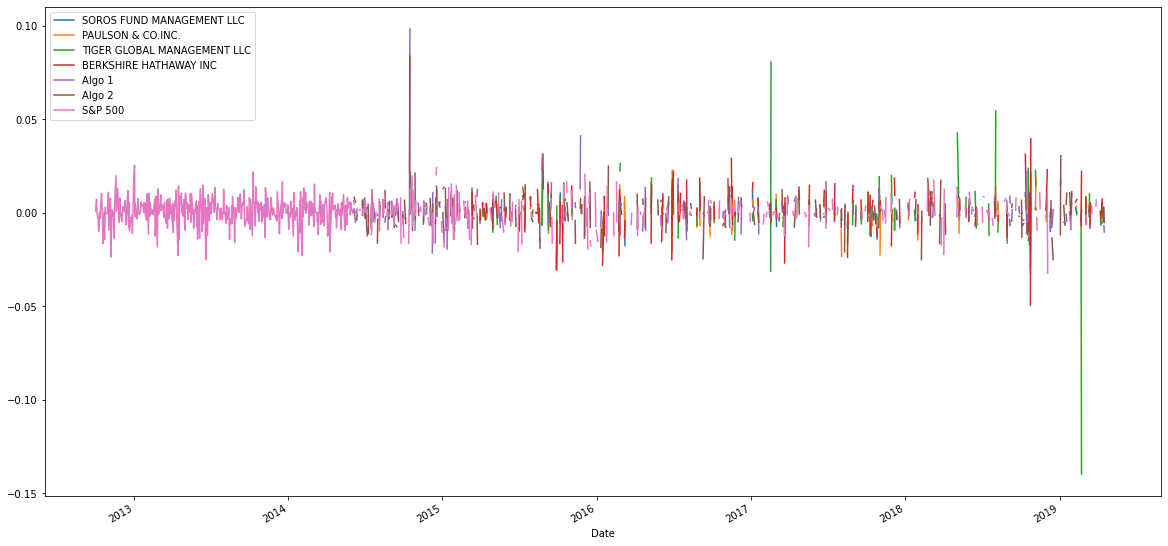

In [131]:
# Plot daily returns
# YOUR CODE HERE
all_returns.plot(kind="line", figsize=(20,10))

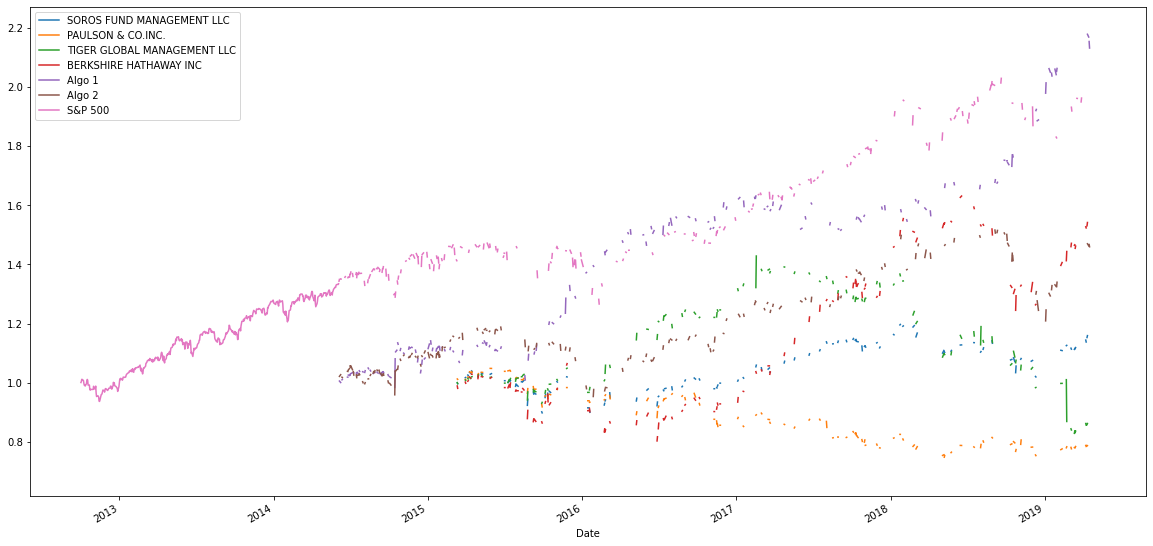

In [132]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + all_returns).cumprod()
cumulative_returns.plot.line(figsize=(20, 10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

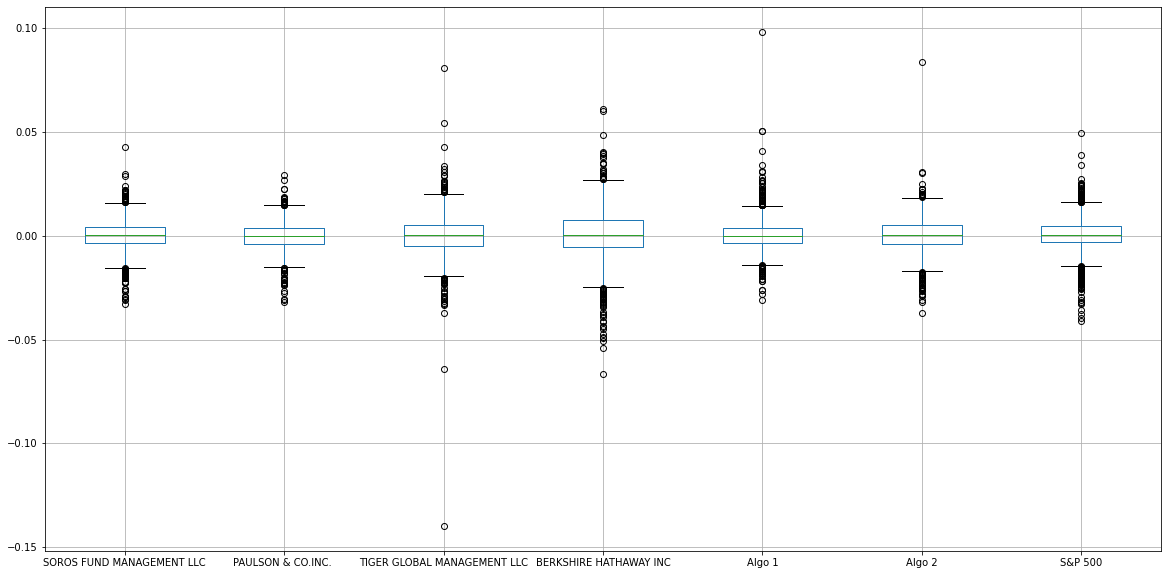

In [133]:
# Box plot to visually show risk
# YOUR CODE HERE
all_returns.boxplot(figsize=(20,10))

In [134]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio.
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
volatility = all_returns.std()
volatility

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007988
Algo 2                         0.008466
S&P 500                        0.008111
dtype: float64

In [135]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

In [136]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annual_volatility = all_returns.std() * np.sqrt(252)
annual_volatility

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
Algo 1                         0.126801
Algo 2                         0.134401
S&P 500                        0.128762
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

In [137]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE

In [138]:
# Construct a correlation table
# YOUR CODE HERE

In [139]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE

In [140]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [141]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE

In [142]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [143]:
# Read the first stock
# YOUR CODE HERE

In [144]:
# Read the second stock
# YOUR CODE HERE

In [145]:
# Read the third stock
# YOUR CODE HERE

In [146]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [147]:
# Reset the index
# YOUR CODE HERE

In [148]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

In [149]:
# Drop Nulls
# YOUR CODE HERE

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [150]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [151]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

In [152]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [153]:
# Risk
# YOUR CODE HERE

In [154]:
# Rolling
# YOUR CODE HERE

In [155]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

In [156]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

In [157]:
# Create a correlation analysis
# YOUR CODE HERE

In [158]:
# Beta
# YOUR CODE HERE